# Полиномиальная регрессия

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

Эта функция генерирует n узлов в интервале от -1 до 1, используя функцию f и шум (к значениям ординат мы прибавляет случайную величину со стандартным нормальным распределением).

In [2]:
def generate_dataset(f, n=50):
    x_nodes = np.linspace(-1., 1., 50)
    sigma = 0.5
    y_nodes = np.array([sigma * np.random.randn() + f(x) for x in x_nodes])
    return x_nodes, y_nodes

Эта функция вычисляет сумму квадратов, которую мы минимизируем. Коротко мы называем ее RSS = residual sum of squares

In [3]:
def rss(X, y, a):
    residual = y - X @ a
    return np.dot(residual, residual)

Эта функция выводит на экран одновременно исходную функцию, сгенерированные узлы и кривую, полученную в результате полиномиальной регрессии. 

In [4]:
def plot_regression(ax, f, x_nodes, y_nodes, fitting=None):
    x_for_plotting = np.linspace(-1., 1., 200)
    ax.plot(x_for_plotting, f(x_for_plotting), 'r', label=r'$\tilde f(x)$', linewidth=2)
    if fitting is not None:
        ax.plot(x_for_plotting, fitting(x_for_plotting), 'g', label='$f(x)$', linewidth=2)
    ax.plot(x_nodes, y_nodes, 'bo', label=r'$y_i$', markersize=8, alpha=0.3)
    ax.set_xlabel(r'$x$', fontsize=16)
    ax.set_ylabel(r'$y$', fontsize=16)
    ax.legend(loc='lower right', fontsize=16)
    ax.grid()


Сгенерируем обучающую выборку и выведем на экран ее вместе с исходной функцией.

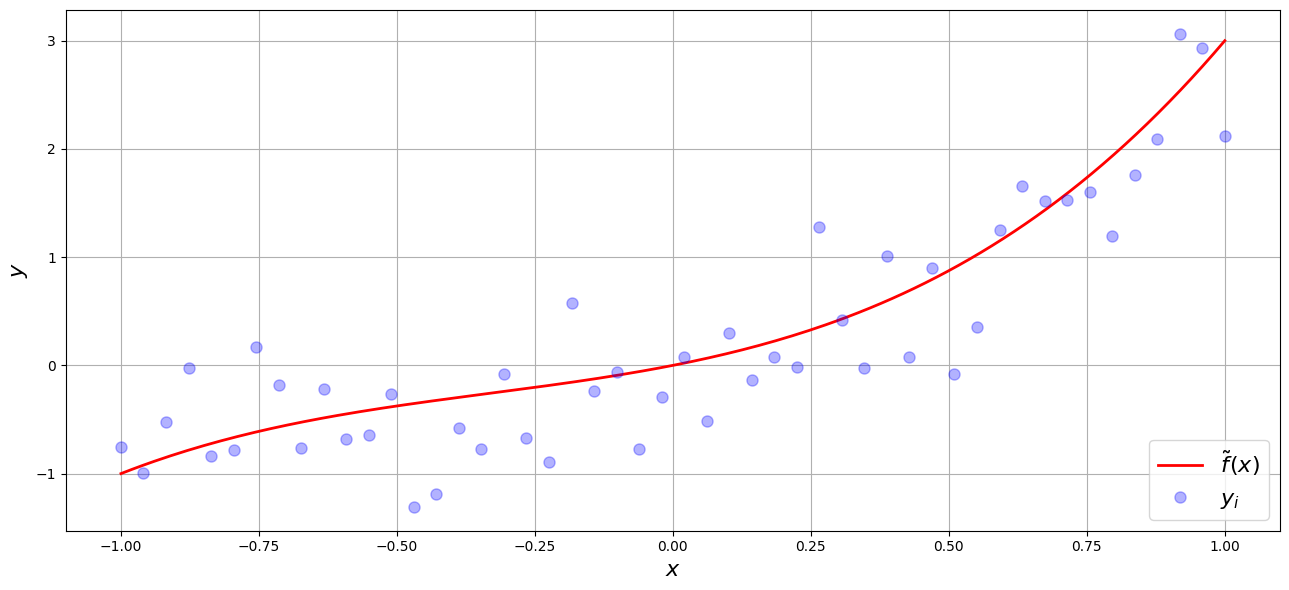

In [5]:
np.random.seed(seed=42)
f = lambda x: x**3 + x**2 + x
x_nodes, y_nodes = generate_dataset(f, n=50)
x_nodes = np.linspace(-1., 1., 50)
x_for_plotting = np.linspace(-1., 1., 200)

fig, ax = plt.subplots(figsize=(13, 6))
plot_regression(ax, f, x_nodes, y_nodes)
plt.tight_layout()
plt.show()


Выполним полиномиальную регрессию для степеней 1, 3, 7 и 15 и построим соответствующие графики. Обратите внимание на большие значения коэффициентов при больших n.

**Задание**: Допишите функцию линейной регрессии, используя только numpy. Используйте нормальное уравнение.

Степень полинома = 1, RSS (сумма квадратов разностей) = 15.00777442748773


<IPython.core.display.Math object>



Степень полинома = 3, RSS (сумма квадратов разностей) = 9.243287267768473


<IPython.core.display.Math object>



Степень полинома = 5, RSS (сумма квадратов разностей) = 9.235064477608049


<IPython.core.display.Math object>



Степень полинома = 9, RSS (сумма квадратов разностей) = 8.329962125964126


<IPython.core.display.Math object>

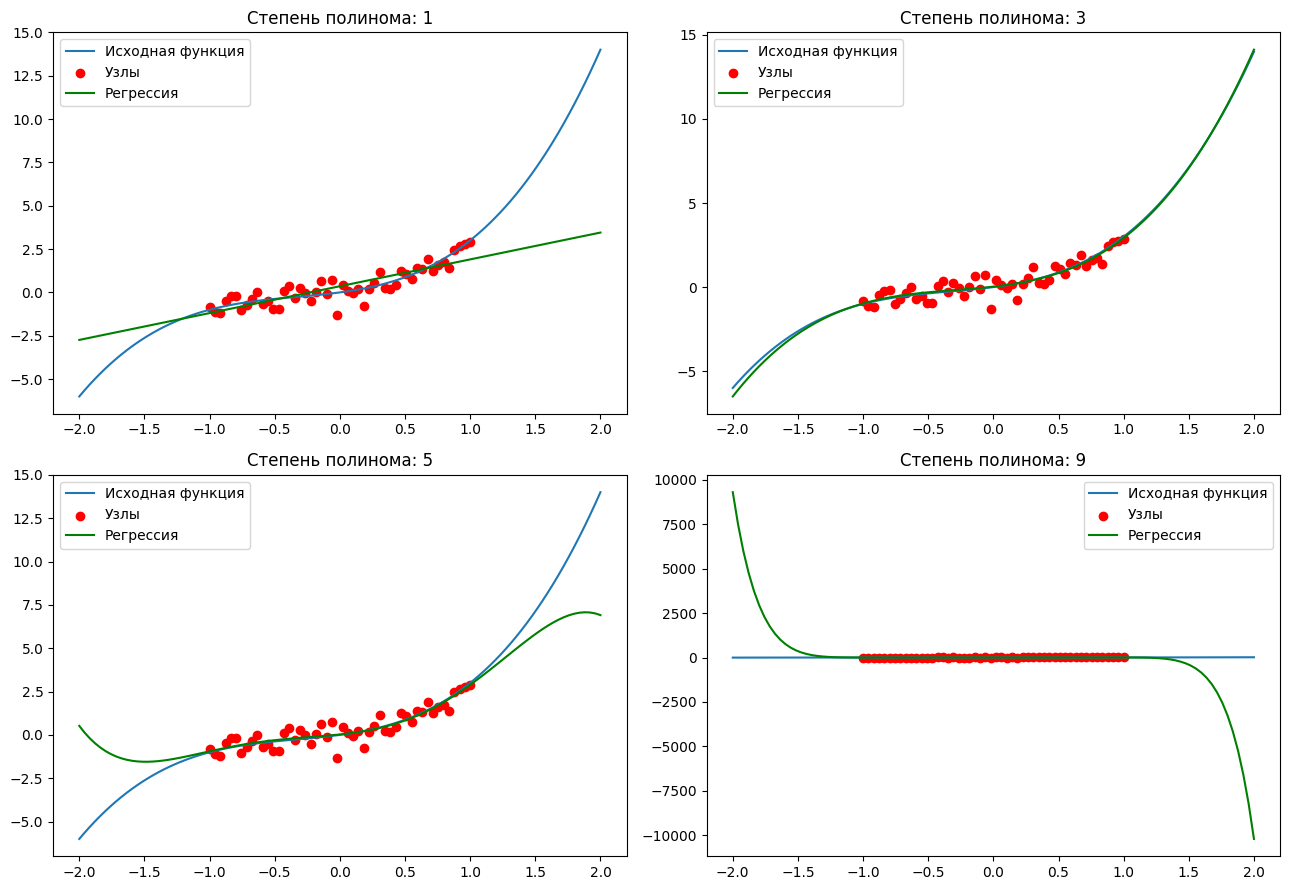

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Math, display

def rss(X, y, a):
    """
    Вычисляет RSS (остаточную сумму квадратов).
    """
    y_pred = X @ a
    return np.sum((y - y_pred)**2)

def plot_regression(ax, f, x_nodes, y_nodes, fitting):
    """
    Визуализирует регрессию.
    """
    x_grid = np.linspace(np.min(x_nodes) - 1, np.max(x_nodes) + 1, 100)
    ax.plot(x_grid, f(x_grid), label='Исходная функция')
    ax.scatter(x_nodes, y_nodes, label='Узлы', color='red')
    ax.plot(x_grid, fitting(x_grid), label='Регрессия', color='green')
    ax.legend()

def polynomial_regression(x_nodes, y_nodes, poly_degree):
    """
    Выполняет полиномиальную регрессию, используя только numpy и нормальное уравнение.
    (Без регуляризации)

    Args:
        x_nodes (np.array): Значения x для узлов.
        y_nodes (np.array): Значения y для узлов.
        poly_degree (int): Степень полинома.

    Returns:
        np.array: Коэффициенты полинома, полученные с помощью нормального уравнения.
    """

    # Создание матрицы Вандермонда
    X = np.vander(x_nodes, N=poly_degree + 1, increasing=True)

    # Применение нормального уравнения
    try:
        a = np.linalg.inv(X.T @ X) @ X.T @ y_nodes
    except np.linalg.LinAlgError:
        return None  # Return None if the matrix is singular

    return a

# --- Пример использования ---

# Узлы
f = lambda x: x**3 + x**2 + x
x_nodes, y_nodes = generate_dataset(f, n=50)

# Создание графиков для разных степеней полинома
fig, axes = plt.subplots(2, 2, figsize=(13, 9))
for ax, poly_degree in zip(axes.reshape(-1), (1, 3, 5, 9)):
    # Вычисление коэффициентов с помощью написанной функции
    a = polynomial_regression(x_nodes, y_nodes, poly_degree)
    if a is not None: # Skip if a is None because of singular matrix
        X = np.vander(x_nodes, N=poly_degree + 1, increasing=True)
        print(f'Степень полинома = {poly_degree}, RSS (сумма квадратов разностей) = {rss(X, y_nodes, a)}')
        monomials = ['', 'x'] + [r'x^{' + str(i) + '}' for i in range(2, poly_degree + 1)]
        display(Math(r'f(x) = ' + '+'.join(['{:.4f}'.format(coeff) + monomial for monomial, coeff in zip(monomials, a)])))
        print('\n')
        fitting_function = lambda x: sum([a[i] * x**i for i in range(len(a))])
        plot_regression(ax, f, x_nodes, y_nodes, fitting=fitting_function)
        ax.set_title(f'Степень полинома: {poly_degree}')
    else:
        print(f'Степень полинома = {poly_degree}: Singular matrix encountered. Skipping plot.')
        ax.set_title(f'Степень полинома: {poly_degree} (Singular Matrix)')

plt.tight_layout()
plt.show()

**Задание**: Проделйте то же самое, но используя LinearRegression из Sklearn.

Степень полинома = 1, RSS (сумма квадратов разностей) = 18.521500943544243


<IPython.core.display.Math object>



Степень полинома = 3, RSS (сумма квадратов разностей) = 11.966714783227186


<IPython.core.display.Math object>



Степень полинома = 5, RSS (сумма квадратов разностей) = 11.811685082358817


<IPython.core.display.Math object>



Степень полинома = 9, RSS (сумма квадратов разностей) = 11.191044580877213


<IPython.core.display.Math object>

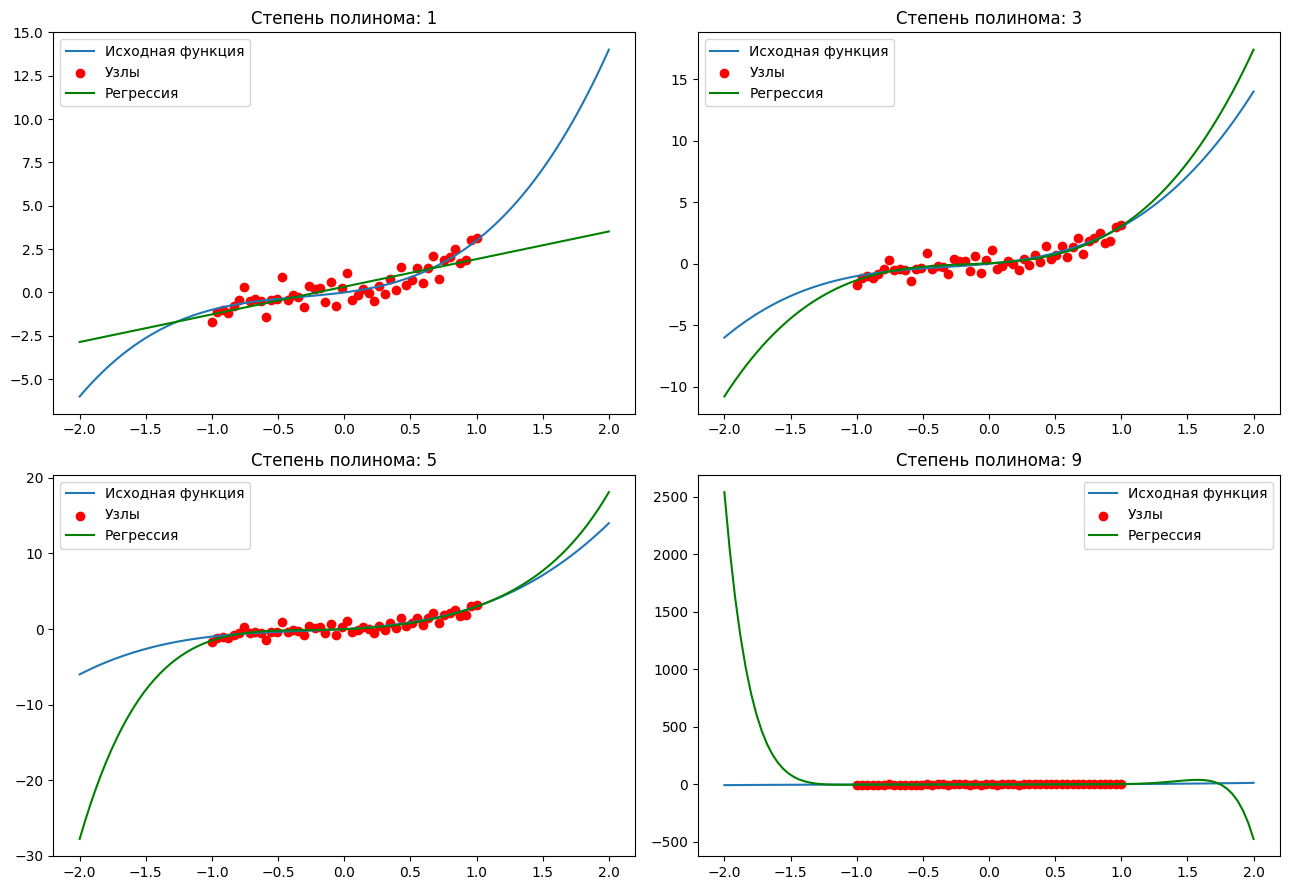

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Math, display
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

def rss(X, y, y_pred):
    """
    Вычисляет RSS (остаточную сумму квадратов).  Важно, чтобы функция принимала y_pred!
    """
    return np.sum((y - y_pred)**2)

def plot_regression(ax, f, x_nodes, y_nodes, fitting):
    """
    Визуализирует регрессию.
    """
    x_grid = np.linspace(np.min(x_nodes) - 1, np.max(x_nodes) + 1, 100)
    ax.plot(x_grid, f(x_grid), label='Исходная функция')
    ax.scatter(x_nodes, y_nodes, label='Узлы', color='red')
    ax.plot(x_grid, fitting(x_grid), label='Регрессия', color='green')
    ax.legend()


# --- Пример использования ---

# Исходная функция
f = lambda x: x**3 + x**2 + x
x_nodes, y_nodes = generate_dataset(f, n=50)

# Создание графиков для разных степеней полинома
fig, axes = plt.subplots(2, 2, figsize=(13, 9))
for ax, poly_degree in zip(axes.reshape(-1), (1, 3, 5, 9)):
    pipe = Pipeline(steps=[
    ('preprocessor', PolynomialFeatures(degree=poly_degree, include_bias=False)),
    ('estimator', LinearRegression())
    ])
    # Обучение модели и получение предсказаний
    pipe.fit(x_nodes.reshape(-1,1), y_nodes)  # Обучение модели
    y_pred = pipe.predict(x_nodes.reshape(-1,1))  # Предсказания для вычисления RSS

    print(f'Степень полинома = {poly_degree}, RSS (сумма квадратов разностей) = {rss(x_nodes, y_nodes, y_pred)}')

    #  Получаем коэффициенты из обученной модели.  Важно правильно извлечь коэффициенты из Pipeline.
    #  LinearRegression находится на втором шаге Pipeline (индекс 1).
    #  PolynomialFeatures возвращает порядок столбцов [x, x^2, ..., x^n], а intercept_ содержит свободный член.
    lr_model = pipe.named_steps['estimator']
    poly = pipe.named_steps['preprocessor']
    a = [lr_model.intercept_] + list(lr_model.coef_)  # Добавляем intercept в начало

    # Формирование строки для отображения коэффициентов в LaTeX
    # В Sklearn без include_bias=True, intercept_ будет добавлен первым, поэтому adjustments в range
    monomials = ['', 'x'] + [r'x^{' + str(i) + '}' for i in range(2, poly_degree + 1)]
    display(Math(r'f(x) = ' + '+'.join(['{:.4f}'.format(coeff) + monomial for monomial, coeff in zip(monomials, a)])))
    print('\n')

    plot_regression(ax, f, x_nodes, y_nodes,
                    fitting=lambda x: pipe.predict(x.reshape(-1,1)))
    ax.set_title(f'Степень полинома: {poly_degree}')

plt.tight_layout()
plt.show()

Воспользуемся $L_2$-регуляризацией. Для примера возьмем $\lambda = 0.1$. Используем буквально тем же кодом, но добавим теперь регуляризацию. Обратите внимание на то, что амплитуда коэффициентов резко снизилась

**Задание**: Допишите функцию линейной регрессии c L2-регуляризацией, используя только numpy. Используйте нормальное уравнение.

Степень полинома = 1, RSS (сумма квадратов разностей) = 13.233942517893082


<IPython.core.display.Math object>



Степень полинома = 3, RSS (сумма квадратов разностей) = 9.213501030584561


<IPython.core.display.Math object>



Степень полинома = 5, RSS (сумма квадратов разностей) = 9.20174973848503


<IPython.core.display.Math object>



Степень полинома = 9, RSS (сумма квадратов разностей) = 8.642585745423704


<IPython.core.display.Math object>

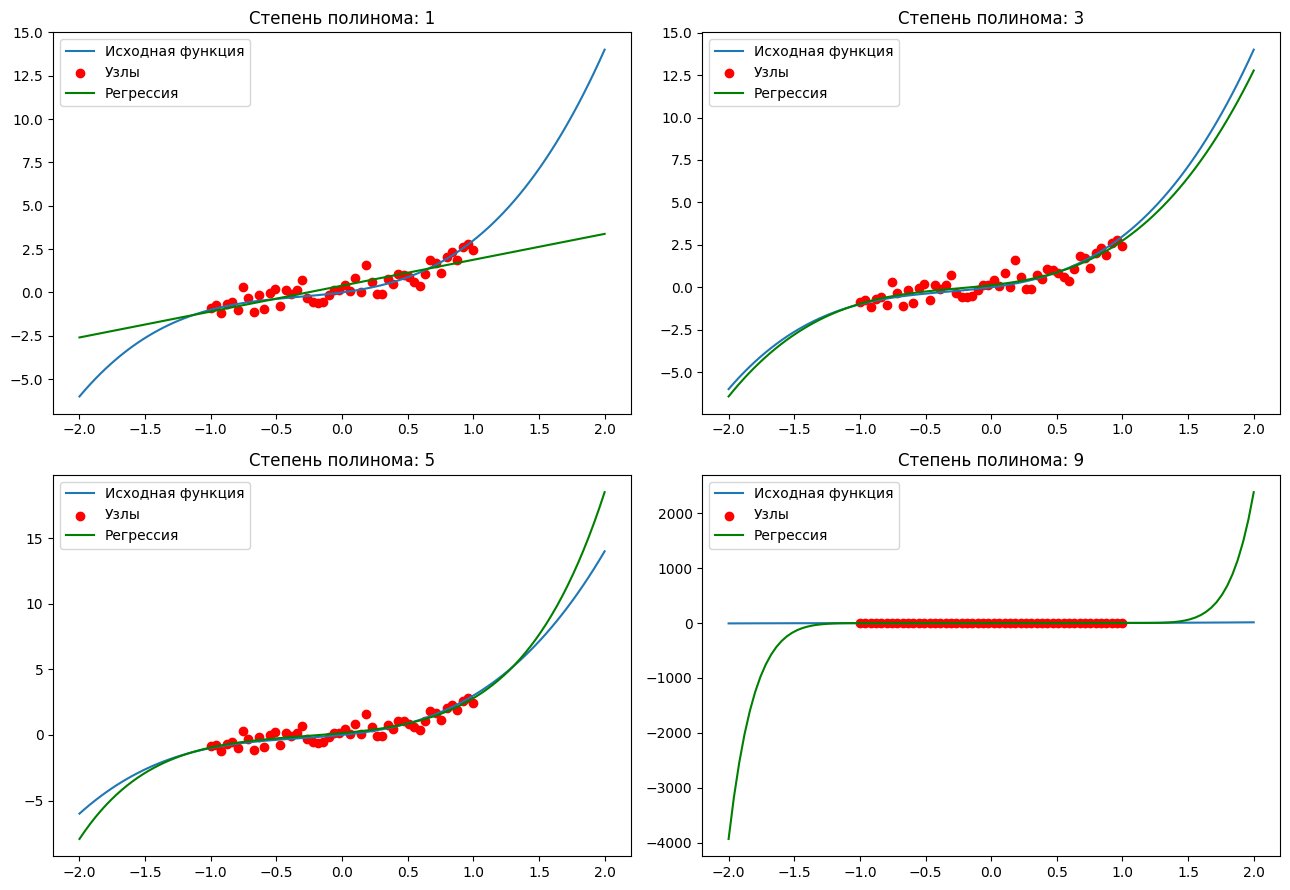

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Math, display

def rss(X, y, a):
    """
    Вычисляет RSS (остаточную сумму квадратов).
    """
    y_pred = X @ a
    return np.sum((y - y_pred)**2)

def plot_regression(ax, f, x_nodes, y_nodes, fitting):
    """
    Визуализирует регрессию.
    """
    x_grid = np.linspace(np.min(x_nodes) - 1, np.max(x_nodes) + 1, 100)
    ax.plot(x_grid, f(x_grid), label='Исходная функция')
    ax.scatter(x_nodes, y_nodes, label='Узлы', color='red')
    ax.plot(x_grid, fitting(x_grid), label='Регрессия', color='green')
    ax.legend()

def polynomial_regression(x_nodes, y_nodes, poly_degree, alpha=1e-8): # Добавляем alpha для регуляризации
    """
    Выполняет полиномиальную регрессию, используя только numpy и нормальное уравнение.
    Добавлена регуляризация (Ridge Regression).

    Args:
        x_nodes (np.array): Значения x для узлов.
        y_nodes (np.array): Значения y для узлов.
        poly_degree (int): Степень полинома.
        alpha (float): Коэффициент регуляризации.

    Returns:
        np.array: Коэффициенты полинома, полученные с помощью нормального уравнения.
    """

    X = np.vander(x_nodes, N=poly_degree + 1, increasing=True)

    XTX = X.T @ X
    I = np.identity(XTX.shape[0])
    a = np.linalg.inv(XTX + alpha * I) @ X.T @ y_nodes

    return a

# --- Пример использования ---

f = lambda x: x**3 + x**2 + x
x_nodes, y_nodes = generate_dataset(f, n=50)

# Создание графиков для разных степеней полинома
fig, axes = plt.subplots(2, 2, figsize=(13, 9))
for ax, poly_degree in zip(axes.reshape(-1), (1, 3, 5, 9)):
    # Вычисление коэффициентов с помощью написанной функции
    a = polynomial_regression(x_nodes, y_nodes, poly_degree)
    X = np.vander(x_nodes, N=poly_degree + 1, increasing=True)
    print(f'Степень полинома = {poly_degree}, RSS (сумма квадратов разностей) = {rss(X, y_nodes, a)}')
    monomials = ['', 'x'] + [r'x^{' + str(i) + '}' for i in range(2, poly_degree + 1)]
    display(Math(r'f(x) = ' + '+'.join(['{:.4f}'.format(coeff) + monomial for monomial, coeff in zip(monomials, a)])))
    print('\n')
    plot_regression(ax, f, x_nodes, y_nodes,
                    fitting=lambda x: sum([a[i] * x**i for i in range(poly_degree + 1)]))
    ax.set_title(f'Степень полинома: {poly_degree}')
plt.tight_layout()
plt.show()

Для того, чтобы определить оптимальное значение гиперпараметра $\lambda$, сгенерирует тестовую выборку (правильнее ее называть validation set).

In [9]:
x_nodes_for_validation, y_nodes_for_validation = generate_dataset(f, n=50)
X_for_validation = np.vander(x_nodes_for_validation, N=poly_degree+1, increasing=True)

Для степени 15 выведем на экран зависимость оптимальной суммы квадратов от $\lambda$. Минимизирующее значение $\lambda$ является оптимальным.

In [10]:
X = np.vander(x_nodes, N=poly_degree+1, increasing=True)
poly_degree = 15
lambda_values = np.logspace(-9, 1, 100)
rss_values = np.zeros_like(lambda_values)
for i, lambda_ in enumerate(lambda_values):
    a = np.linalg.inv(X.T @ X + lambda_*np.identity(poly_degree+1)) @ X.T @ y_nodes
    rss_values[i] = rss(X_for_validation, y_nodes_for_validation, a)
fig, ax = plt.subplots(figsize=(13, 6))
ax.semilogx(lambda_values, rss_values, linewidth=2)
ax.set_xlabel(r'$\lambda$', fontsize=16)
ax.set_ylabel('RSS', fontsize=16)
ax.grid()
plt.tight_layout()
plt.show()

ValueError: operands could not be broadcast together with shapes (10,10) (16,16) 

**Задание**: Допишите функцию линейной регрессии c L2-регуляризацией, но используя Sklearn. Используйте класс Ridge.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Math, display
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

def rss(X, y, y_pred):
    """
    Вычисляет RSS (остаточную сумму квадратов).
    """
    return np.sum((y - y_pred)**2)

def plot_regression(ax, f, x_nodes, y_nodes, fitting):
    """
    Визуализирует регрессию.
    """
    x_grid = np.linspace(np.min(x_nodes) - 1, np.max(x_nodes) + 1, 100)
    ax.plot(x_grid, f(x_grid), label='Исходная функция')
    ax.scatter(x_nodes, y_nodes, label='Узлы', color='red')
    ax.plot(x_grid, fitting(x_grid), label='Регрессия', color='green')
    ax.legend()

# --- Пример использования ---

f = lambda x: x**3 + x**2 + x
x_nodes, y_nodes = generate_dataset(f, n=50)

# Создание графиков для разных степеней полинома
fig, axes = plt.subplots(2, 2, figsize=(13, 9))
for ax, poly_degree in zip(axes.reshape(-1), (1, 3, 5, 9)):
    pipe = Pipeline(steps=[
    ('preprocessor', PolynomialFeatures(degree=poly_degree, include_bias=False)),
    ('estimator', Ridge(alpha=1.0))  # Добавляем параметр alpha для регуляризации
    ])

    # Обучение модели и получение предсказаний
    pipe.fit(x_nodes.reshape(-1,1), y_nodes)
    y_pred = pipe.predict(x_nodes.reshape(-1,1))

    print(f'Степень полинома = {poly_degree}, RSS (сумма квадратов разностей) = {rss(x_nodes, y_nodes, y_pred)}')

    # Получение коэффициентов
    ridge_model = pipe.named_steps['estimator']
    poly = pipe.named_steps['preprocessor']

    a = [ridge_model.intercept_] + list(ridge_model.coef_)

    # Формирование строки для отображения коэффициентов в LaTeX
    monomials = ['', 'x'] + [r'x^{' + str(i) + '}' for i in range(2, poly_degree + 1)]
    display(Math(r'f(x) = ' + '+'.join(['{:.4f}'.format(coeff) + monomial for monomial, coeff in zip(monomials, a)])))
    print('\n')

    plot_regression(ax, f, x_nodes, y_nodes,
                    fitting=lambda x: pipe.predict(x.reshape(-1,1)))
    ax.set_title(f'Степень полинома: {poly_degree}')

plt.tight_layout()
plt.show()


Продемонстрируем теперь эффект от $L_1$-регуляризации. Ее особенность состоит в том, что она приводит к занулению как можно большего количества коэффициентов.

Так как сама задача минимизации уже не решается аналитически, мы воспользуемся пакетом scikit-learn.

In [ ]:
from sklearn import linear_model

poly_degree = 15
X = np.vander(x_nodes, N=poly_degree+1, increasing=True)
clf = linear_model.Lasso(alpha=0.03)
clf.fit(X, y_nodes)
a = clf.coef_
print(f'Степень полинома = {poly_degree}')
display(Math(r'f(x) = ' + '+'.join(['{:.4f}'.format(coeff) + monomial for monomial, coeff in zip(['', 'x'] + [r'x^{' + str(i) + '}' for i in range(2, poly_degree+1)], a)])))
print('\n')
fig, ax = plt.subplots(figsize=(13, 6))
plot_regression(ax, f, x_nodes, y_nodes, 
                fitting=lambda x: sum([a[i] * x**i for i in range(poly_degree + 1)]))
plt.show()